In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import re
from sklearn.cluster import KMeans

In [2]:
# Read the cell table data
# base_dir = '/Users/mansoorehahmadian/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/PI_Projects/Joshua_thurman/TISAC_V3'
# df = pd.read_csv(os.path.join(base_dir, 'cell_table_QC1.csv'))

# with open(os.path.join(base_dir, 'fov_map_to_int.txt')) as f:
#     lines = f.readlines()
#     fov_int_map = { int(line.split(':')[1]): line.split(':')[0] for line in lines}
# df['fov'] = df['fov_int']
# df['fov'] = df['fov'].map(fov_int_map)

# batch_1 = ['UCD125', 'UCD126', 'UCD127']
# batch_2 = ['UCD129', 'UCD130', 'UCD131']  # Replace with your actual sample names

# # Create boolean masks for each batch
# mask_batch_1 = df['fov'].str.contains('|'.join(batch_1))
# mask_batch_2 = df['fov'].str.contains('|'.join(batch_2))

# # Assign batch numbers
# df.loc[mask_batch_1, 'batch'] = 1
# df.loc[mask_batch_2, 'batch'] = 2

# df.to_csv('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/TISAC_cell_table.csv', index=False)





In [3]:
# df = pd.read_csv('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/TISAC_cell_table.csv')


In [4]:
# df = pd.read_csv('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/concat_1.csv')
# cell_type_ordered_map = {1:'known', 3:'CD4T', 4:'CD3T', 2:'CD8T', 5:'Neutrophils', 9:'NK cells', 6:'M1 Macrophages',
#                            7:'M2 Macrophages', 8:'CD163+DC_SIGN+', 10:'CD16+', 12:'other-immune',
#                            19:'HLADR+', 13:'Blood vessel endothelial cells',14:'Lympathic vessel endothelial cells',  
#                            16:'SMA+',15:'SMA+Vimentin+', 18:'Vimentin+',  11:'Epithelial cells', 21:'Unknown',
#                          17:'Epithelial cells', 20: 'Tubular cells'}
# df['cell_type_after_QC'] = df['SampleID'].map(cell_type_ordered_map)
# df_sorted = df.sort_values(by=['fov_int', 'label'])
# df_sorted.to_csv('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/TISAC_cell_table_after_phenotyping_QC.csv', index=False)

In [15]:
# df = pd.read_csv('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/TISAC_cell_table.csv')
# cell_type_ordered_map = {'CD4T':1, 'CD3T':2, 'CD8T':3, 'Neutrophils':4, 'NK cells':5, 'M1 Macrophages':6,
#                            'M2 Macrophages':7, 'CD163+DC_SIGN+':8, 'CD16+':9, 'other-immune':10,
#                            'HLADR+':11, 'Blood vessel endothelial cells':12,'Lympathic vessel endothelial cells':13,  
#                            'SMA+':14,'SMA+Vimentin+':15, 'Vimentin+':16,  'Epithelial cells':17,
#                          'Tubular cells':19,'Unknown':18}
# cell_map = {value : key for key,value in cell_type_ordered_map.items()}
# df['cell_type_after_QC'] = df['cell_type_after_QC_int'].map(cell_map)
# df.to_csv('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/TISAC_cell_table_April12.csv', index=False)

In [2]:
df_all = pd.read_csv("/Users/dhyscuduke/Desktop/whole_cell_segmentation_table_SLE and Fuentes.csv")


In [3]:
df_all.columns
#len(df_all)
#df_all
df_all = df_all.rename(
    columns={
        'Foxp3..1.': 'Foxp3',
        'CD4..1.': 'CD4',
        'CD3..1.': 'CD3',
        'CD8..1.': 'CD8',
        'CD56..1.': 'CD56',
        'CD20..1.': 'CD20',
        'CD11b..1.': 'CD11b',
        'CD11c..1.': 'CD11c',
        'CD14..1.': 'CD14',
        'CD16..1.': 'CD16',
        'CD163..1.': 'CD163',
        'CD68..1.': 'CD68',
        'CD38..1.': 'CD38',
        'CD45RO..1.': 'CD45RO',
        'DC.SIGN..1.': 'DC.SIGN',
        'MPO..1.': 'MPO',
        'HLADR..1.': 'HLADR',
        'CD45..1.': 'CD45',
        'CD31..1.': 'CD31',
        'SMA..1.': 'SMA',
        'Vimentin..1.': 'Vimentin',
        'PAN.KERATIN..1.': 'PAN.KERATIN',
        'Podoplanin..1.': 'Podoplanin',
    }
)
df_all.columns

Index(['cell_size', 'B.Tubulin..1.', 'C3d29..1.', 'CC3..1.', 'CD11b', 'CD11c',
       'CD14', 'CD16', 'CD163', 'CD20', 'CD21..1.', 'CD3', 'CD31', 'CD38',
       'CD4', 'CD45', 'CD45RO', 'CD56', 'CD68', 'CD8', 'CXCR5..1.',
       'Col.III..1.', 'DC.SIGN', 'Factor.H..1.', 'Foxp3', 'Granzyme.B..1.',
       'HLA.Class.1..1.', 'HLADR', 'IgA..1.', 'IgG.PE..1.', 'IgM..1.',
       'Ki67..1.', 'MPO', 'PAN.KERATIN', 'PD.1..1.', 'PE..1.', 'Podoplanin',
       'SMA', 'Vimentin', 'dsDNA..1.', 'label', 'area', 'eccentricity',
       'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area',
       'equivalent_diameter', 'centroid.0', 'centroid.1',
       'major_minor_axis_ratio', 'perim_square_over_area',
       'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif',
       'num_concavities', 'fov', 'cell_type', 'cluster', 'cell_type_renew1',
       'cell_type_renew2'],
      dtype='object')

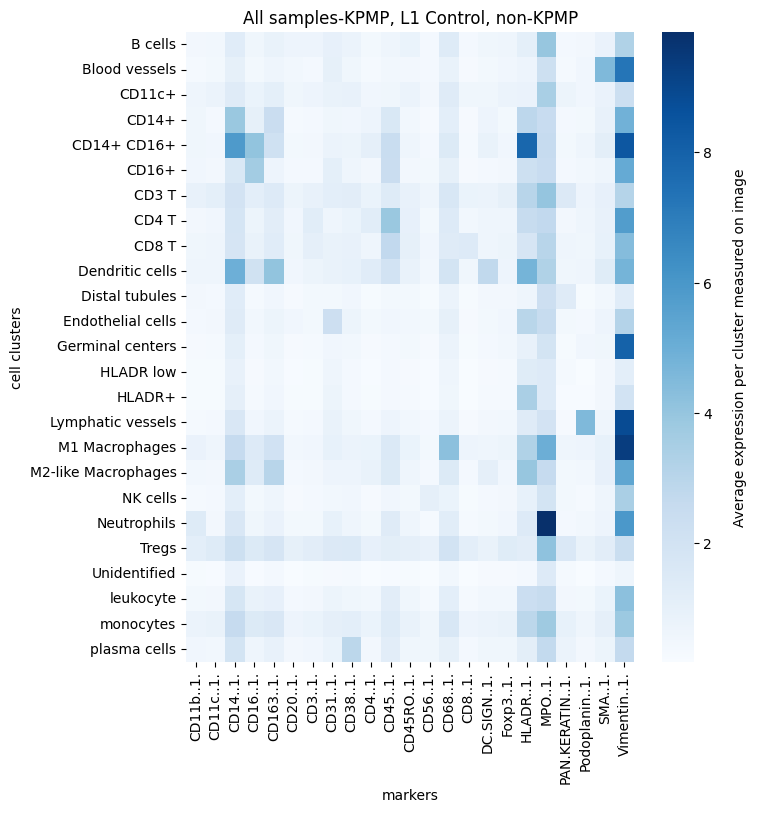

In [89]:
df = df_all
# All samples together

custom_order_cellType = ['CD11b..1.',
       'CD11c..1.', 'CD14..1.', 'CD16..1.', 'CD163..1.', 'CD20..1.',
       'CD3..1.', 'CD31..1.', 'CD38..1.', 'CD4..1.', 'CD45..1.',
       'CD45RO..1.', 'CD56..1.', 'CD68..1.', 'CD8..1.',
       'DC.SIGN..1.', 'Foxp3..1.',
       'HLADR..1.', 'MPO..1.', 'PAN.KERATIN..1.', 'Podoplanin..1.', 'SMA..1.', 'Vimentin..1.']

clustering_marker = ['CD11b..1.',
       'CD11c..1.', 'CD14..1.', 'CD16..1.', 'CD163..1.', 'CD20..1.',
       'CD3..1.', 'CD31..1.', 'CD38..1.', 'CD4..1.', 'CD45..1.',
       'CD45RO..1.', 'CD56..1.', 'CD68..1.', 'CD8..1.',
       'DC.SIGN..1.', 'Foxp3..1.',
       'HLADR..1.', 'MPO..1.', 'PAN.KERATIN..1.', 'Podoplanin..1.', 'SMA..1.', 'Vimentin..1.', 'cell_type_renew2']

df = df[clustering_marker]

selected_columns = clustering_marker[:-1]

#percentiles = df.iloc[:,0:-1].quantile(0.995)

df = df[clustering_marker[:]]

summary_hm = df.groupby('cell_type_renew2').mean()

summary_hm_sorted = summary_hm#.reindex(custom_order_cellType)


for col in summary_hm_sorted.columns:
    summary_hm_sorted.rename(columns={col: col.split('(')[0]}, inplace=True)
    
fig, (ax) = plt.subplots(figsize=[8,10])
sns.heatmap(summary_hm_sorted,ax=ax, cmap='Blues')
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.2)
plt.xlabel("markers")
plt.ylabel("cell clusters")
# Add a color bar with a label
cax = plt.gcf().axes[-1]  # Get the color bar axes
cax.set_ylabel("Average expression per cluster measured on image", rotation=90, labelpad=15)  # Add color bar label
plt.title('All samples-KPMP, L1 Control, non-KPMP')
summary_hm_sorted_reset = summary_hm_sorted.reset_index()
#plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/hm_all_mean_1_2.png')
plt.show()



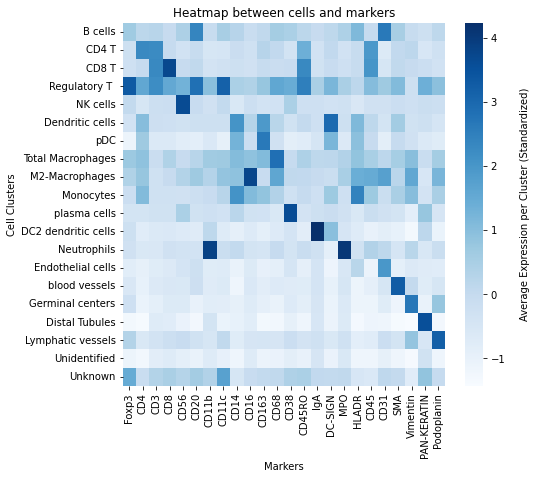

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 示例数据
# df_all = ... # 假设你已经有一个 df_all 数据框

custom_order_cellType = ['Foxp3', 'CD4', 'CD3', 'CD8', 'CD56', 
                         'CD20', 'CD11b', 'CD11c', 'CD14', 'CD16', 'CD163', 
                         'CD68', 'CD38', 'CD45RO', 'IgA',
                         'DC-SIGN', 'MPO', 'HLADR', 'CD45', 'CD31', 'SMA', 
                         'Vimentin', 'PAN-KERATIN', 'Podoplanin']

clustering_marker = custom_order_cellType + ['cell_type']

# 选择感兴趣的列
df = df_all[clustering_marker]

# 计算每个细胞簇的平均值
summary_hm = df.groupby('cell_type').mean()

# 对每个细胞簇的标记进行标准化
scaler = StandardScaler()
summary_hm_scaled = summary_hm.copy()
summary_hm_scaled[custom_order_cellType] = scaler.fit_transform(summary_hm[custom_order_cellType])

# 重命名列以便更好的显示
for col in summary_hm_scaled.columns:
    summary_hm_scaled.rename(columns={col: col.split('(')[0]}, inplace=True)
    
# 设置自定义的 cell_type_renew2 顺序
cell_type_order = ['B cells', 'CD4 T', 'CD8 T', 'Regulatory T ', 'NK cells', 'Dendritic cells', 
                   'pDC', 'Total Macrophages', 'M2-Macrophages', 'Monocytes', 'plasma cells', 'DC2 dendritic cells',
                    'Neutrophils', 'Endothelial cells', 'blood vessels', 'Germinal centers', 'Distal Tubules', 'Lymphatic vessels',
                'Unidentified', 'Unknown']  # 替换为你实际的细胞簇顺序
summary_hm_scaled.index = pd.CategoricalIndex(summary_hm_scaled.index, categories=cell_type_order, ordered=True)
summary_hm_scaled = summary_hm_scaled.sort_index()

# 绘制热图
fig, ax = plt.subplots(figsize=[8, 8])
sns.heatmap(summary_hm_scaled, ax=ax, cmap='Blues')

# 调整子图间距
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.2)

# 添加坐标轴标签
plt.xlabel("Markers")
plt.ylabel("Cell Clusters")

# 添加颜色条及其标签
cax = plt.gcf().axes[-1]  # 获取颜色条轴
cax.set_ylabel("Average Expression per Cluster (Standardized)", rotation=90, labelpad=15)  # 添加颜色条标签

# 添加标题
plt.title('Heatmap between cells and markers')

# 显示图表
plt.show()

In [9]:

# KPMP samples
df = df_all
kpmp = ['_N-', '_LN', 'IGA', 'FSGS']

# Filter rows for each sample in batch_1 and concatenate into a single DataFrame
df_kpmp = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp])
df = df_kpmp

print(df_all.shape[0])

# custom_order_cellType = ['CD4T', 'CD3T', 'CD8T', 'Neutrophils', 'NK cells', 'M1 Macrophages',
#                            'M2 Macrophages', 'CD163+DC_SIGN+', 'CD16+', 'other-immune',
#                            'HLADR+', 'Blood vessel endothelial cells','Lympathic vessel endothelial cells',  
#                            'SMA+','SMA+Vimentin+', 'Vimentin+',  'Epithelial cells','Tubular cells','Unknown']

# clustering_marker = [ 'CD4 (169)','CD3 (159)', 'CD8 (167)', 'MPO (115)','CD56 (162)', 'CD68 (141)',
#                       'CD163 (152)','DC-SIGN (173)', 'CD16 (153)','CD45 (163)','HLADR (174)',
#                      'CD31 (145)', 'Podoplanin (170)', 'SMA (164)','Vimentin (154)',
#                      'PAN-KERATIN (142)','B-Tubulin (113)','cell_type_after_QC']

# percentiles = df.iloc[:,0:-1].quantile(0.995)
# df = df[clustering_marker]

# selected_columns = clustering_marker[:-1]



# def power_normalize(column, power=1.2):
#     return (column ** power) / percentiles[column.name] if column.name in selected_columns else column
# # Apply the function to the DataFrame
# df = df.apply(power_normalize)



# df = df[clustering_marker[:]]

# summary_hm = df.groupby('cell_type_after_QC').median()

# summary_hm_sorted = summary_hm.reindex(custom_order_cellType)

# for col in summary_hm_sorted.columns:
#     summary_hm_sorted.rename(columns={col: col.split('(')[0]}, inplace=True)
    
# fig, (ax) = plt.subplots(figsize=[10,6])
# sns.heatmap(summary_hm_sorted,ax=ax, cmap='Blues')
# plt.subplots_adjust(bottom=0.25)
# plt.subplots_adjust(left=0.2)
# plt.xlabel("markers")
# plt.ylabel("cell clusters")
# # Add a color bar with a label
# cax = plt.gcf().axes[-1]  # Get the color bar axes
# cax.set_ylabel("Average expression per cluster measured on image", rotation=90, labelpad=15)  # Add color bar label
# plt.title('KPMP samples')
# summary_hm_sorted_reset = summary_hm_sorted.reset_index()
# plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/hm_kpmp_mean_1_2_kpmp.png')
# plt.show()




547629


In [39]:
# KPMP samples
df = df_all
kpmp = ['LN']

# Filter rows for each sample in batch_1 and concatenate into a single DataFrame
df_L1 = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp])
df = df_L1



custom_order_cellType = ['CD11b..1.',
       'CD11c..1.', 'CD14..1.', 'CD16..1.', 'CD163..1.', 'CD20..1.',
       'CD3..1.', 'CD31..1.', 'CD38..1.', 'CD4..1.', 'CD45..1.',
       'CD45RO..1.', 'CD56..1.', 'CD68..1.', 'CD8..1.',
       'DC.SIGN..1.', 'Foxp3..1.',
       'HLADR..1.', 'MPO..1.', 'PAN.KERATIN..1.', 'Podoplanin..1.', 'SMA..1.', 'Vimentin..1.']

clustering_marker = ['CD11b..1.',
       'CD11c..1.', 'CD14..1.', 'CD16..1.', 'CD163..1.', 'CD20..1.',
       'CD3..1.', 'CD31..1.', 'CD38..1.', 'CD4..1.', 'CD45..1.',
       'CD45RO..1.', 'CD56..1.', 'CD68..1.', 'CD8..1.',
       'DC.SIGN..1.', 'Foxp3..1.',
       'HLADR..1.', 'MPO..1.', 'PAN.KERATIN..1.', 'Podoplanin..1.', 'SMA..1.', 'Vimentin..1.']

percentiles = df.iloc[:,0:-1].quantile(0.995)
df = df[clustering_marker]

selected_columns = clustering_marker[:-1]



def power_normalize(column, power=1.2):
    return (column ** power) / percentiles[column.name] if column.name in selected_columns else column
# Apply the function to the DataFrame
df = df.apply(power_normalize)



df = df[clustering_marker[:]]

summary_hm = df.groupby('cell_type_renew1').median()

summary_hm_sorted = summary_hm.reindex(custom_order_cellType)

for col in summary_hm_sorted.columns:
    summary_hm_sorted.rename(columns={col: col.split('(')[0]}, inplace=True)
    
fig, (ax) = plt.subplots(figsize=[10,6])
sns.heatmap(summary_hm_sorted,ax=ax, cmap='Blues')
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.2)
plt.xlabel("markers")
plt.ylabel("cell clusters")
# Add a color bar with a label
cax = plt.gcf().axes[-1]  # Get the color bar axes
cax.set_ylabel("Average expression per cluster measured on image", rotation=90, labelpad=15)  # Add color bar label
plt.title('L1 control')
summary_hm_sorted_reset = summary_hm_sorted.reset_index()
plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/hm_L1_contol.png')
plt.show()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

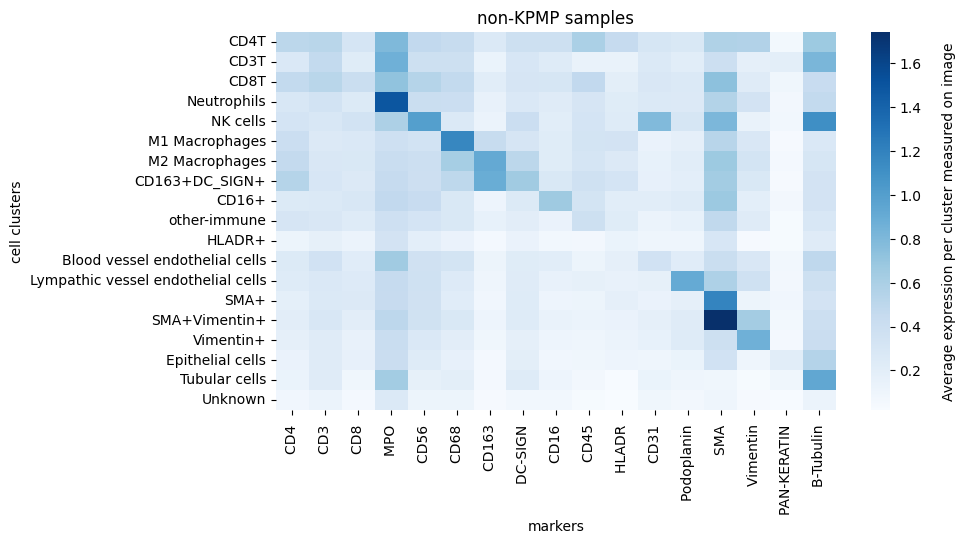

In [90]:
# KPMP samples
df = df_all
kpmp_l1 = ['017', '067', '077', '078','L1']

# Filter rows for each sample in batch_1 and concatenate into a single DataFrame
df_kpmp = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp_l1])
df_non_kpmp = df[~df['fov'].str.contains('|'.join(kpmp))]
df = df_non_kpmp



custom_order_cellType = ['CD4T', 'CD3T', 'CD8T', 'Neutrophils', 'NK cells', 'M1 Macrophages',
                           'M2 Macrophages', 'CD163+DC_SIGN+', 'CD16+', 'other-immune',
                           'HLADR+', 'Blood vessel endothelial cells','Lympathic vessel endothelial cells',  
                           'SMA+','SMA+Vimentin+', 'Vimentin+',  'Epithelial cells','Tubular cells','Unknown']

clustering_marker = [ 'CD4 (169)','CD3 (159)', 'CD8 (167)', 'MPO (115)','CD56 (162)', 'CD68 (141)',
                      'CD163 (152)','DC-SIGN (173)', 'CD16 (153)','CD45 (163)','HLADR (174)',
                     'CD31 (145)', 'Podoplanin (170)', 'SMA (164)','Vimentin (154)',
                     'PAN-KERATIN (142)','B-Tubulin (113)','cell_type_after_QC']


df = df[clustering_marker]

selected_columns = clustering_marker[:-1]



def power_normalize(column, power=1.2):
    return (column ** power) / percentiles[column.name] if column.name in selected_columns else column
# Apply the function to the DataFrame
df = df.apply(power_normalize)



df = df[clustering_marker[:]]

summary_hm = df.groupby('cell_type_after_QC').mean()

summary_hm_sorted = summary_hm.reindex(custom_order_cellType)

for col in summary_hm_sorted.columns:
    summary_hm_sorted.rename(columns={col: col.split('(')[0]}, inplace=True)
    
fig, (ax) = plt.subplots(figsize=[10,6])
sns.heatmap(summary_hm_sorted,ax=ax, cmap='Blues')
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.2)
plt.xlabel("markers")
plt.ylabel("cell clusters")
# Add a color bar with a label
cax = plt.gcf().axes[-1]  # Get the color bar axes
cax.set_ylabel("Average expression per cluster measured on image", rotation=90, labelpad=15)  # Add color bar label
plt.title('non-KPMP samples')
summary_hm_sorted_reset = summary_hm_sorted.reset_index()
plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/hm_mean_1_2_non_kpmp.png')
plt.show()




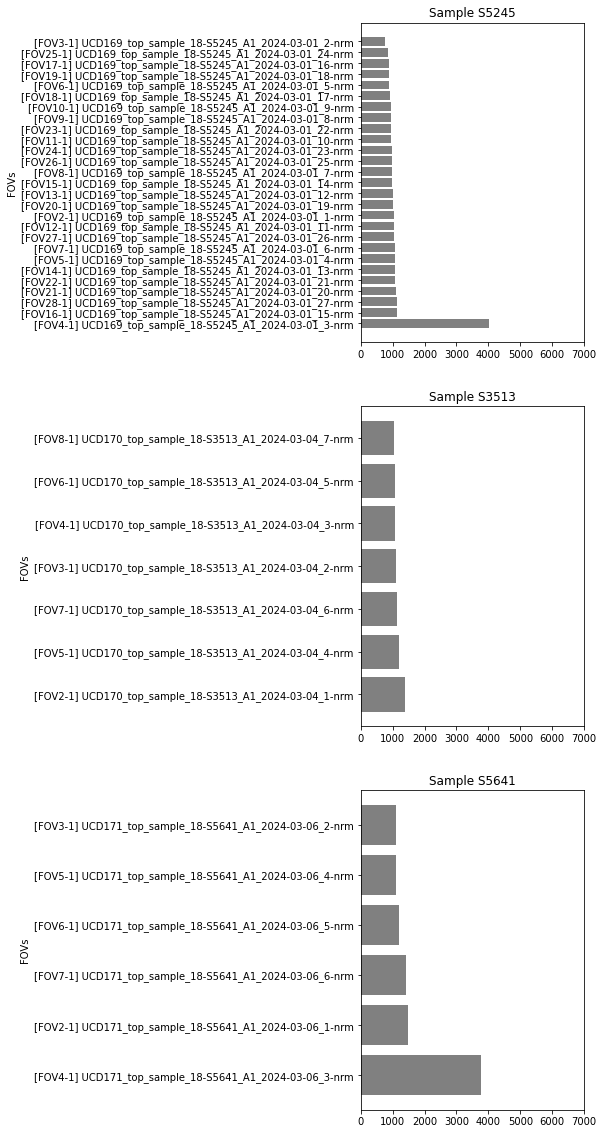

In [9]:
df = df_all
# drop the croped fov that has very a few cells

#df = df[df['fov'] != '[FOV2-1]UCD131_middle_sample_077-Large_2023-04-10_1-bgc-nrm']

#base_dir = '/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/'
# Define the sample numbers
samples = ['S5245', 'S3513', 'S5641']


# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Sample', 'Count'])
# Create a grid of subplots
fig, axes = plt.subplots(len(samples), 1, figsize=(4, 20))

for i, sample in enumerate(samples):
    # Filter rows containing the sample number
    filtered_df = df[df['fov'].str.contains(sample)]
    
    # Count the unique values in the filtered DataFrame
    unique_counts = filtered_df['fov'].value_counts()
    
    # Plot the bar plot in the current subplot
    axes[i].barh(unique_counts.index, unique_counts.values, color='gray')
#     axes[i].set_xlabel('Total Cell Counts')
    axes[i].set_ylabel('FOVs')
    axes[i].set_title(f'Sample {sample}')
    
    # Set the x-axis limit for each subplot if the data is not empty
    if not unique_counts.empty:
        axes[i].set_xlim([0, 7000])  # Set the same x-axis limit for all subplots

#plt.savefig(os.path.join(base_dir, 'cell_counts'))
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

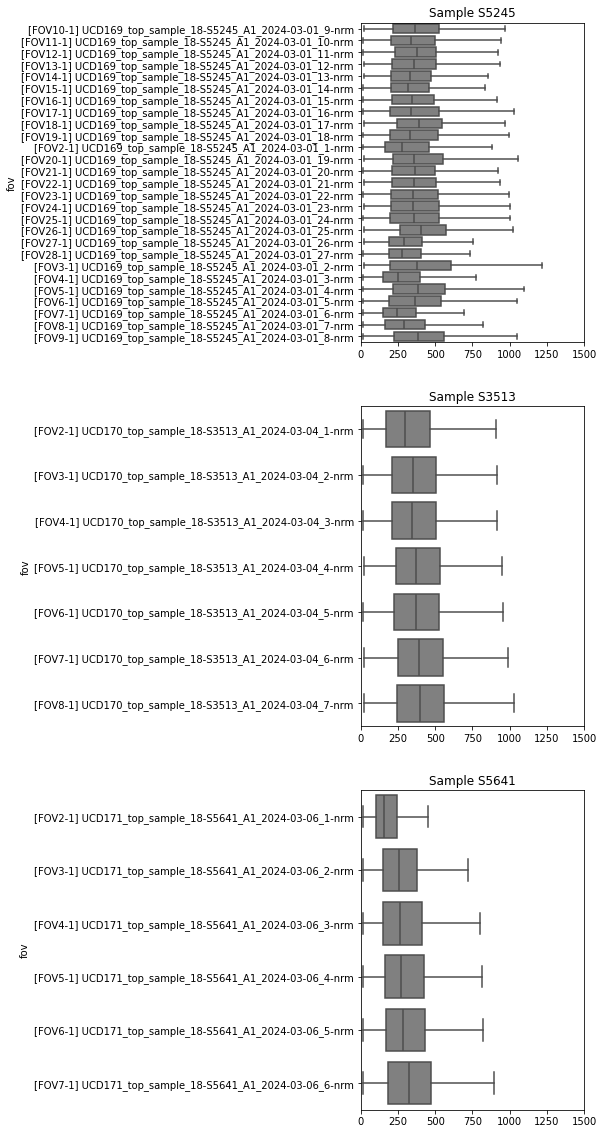

In [10]:
# Define the sample numbers
df = df_all
samples = ['S5245', 'S3513', 'S5641']
#df = df[df['fov'] != '[FOV2-1]UCD131_middle_sample_077-Large_2023-04-10_1-bgc-nrm']
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Sample', 'Count'])
# Create a grid of subplots
fig, axes = plt.subplots(len(samples), 1, figsize=(4, 20))

for i, sample in enumerate(samples):
    # Filter rows containing the sample number
    filtered_df = df[df['fov'].str.contains(sample)]
    
    sns.boxplot( y=filtered_df["fov"], x=filtered_df["cell_size"], ax=axes[i], color='gray', showfliers=False )
    # Set the x-axis limit for each subplot if the data is not empty
    if not unique_counts.empty:
        axes[i].set_xlim([0, 1500])  # Set the same x-axis limit for all subplots
    axes[i].set_title(f'Sample {sample}')
    axes[i].set_xlabel('')
plt.tight_layout()
#plt.savefig(os.path.join(base_dir, 'cell_size_boxplot.png'))
plt.show()

In [33]:
# df = df_all
# # summarize by fov
# # Pivot table for raw counts
# df_pivot = df.pivot_table(index='fov', columns='cell_type_after_QC', aggfunc='size', fill_value=0)
# df_pivot.to_csv(os.path.join(base_dir, 'summary_TISAC_raw_counts_April15.csv'))



# # Calculate the sum of each row (axis=1) and store it in a new column 'total'
# df_pivot['total'] = df_pivot.sum(axis=1)

# # Create a new DataFrame to store the percentage values
# df_percentage = df_pivot.copy()

# # Divide each element in a row by the corresponding total
# for col in df_pivot.columns:
#     df_percentage[col] = df_pivot[col] / df_pivot['total']

# # Drop the 'total' column
# df_percentage.drop(columns='total', inplace=True)

# # Save the result to a CSV file
# df_percentage.to_csv(os.path.join(base_dir, 'summary_TISAC_percentage_April15.csv'))


In [73]:
df_percentage = pd.read_csv(r'C:\Users\duho\Desktop\percentage_without_unidentified.csv')
df_percentage.columns

Index(['fov', 'B cells', 'Blood vessels', 'CD11c+', 'CD14+', 'CD16+', 'CD3 T',
       'CD4 T', 'CD8 T', 'Dendritic cells', 'Distal tubules',
       'Endothelial cells', 'Germinal centers', 'HLADR low', 'HLADR+',
       'Lymphatic vessels', 'M1 Macrophages', 'M2-like Macrophages',
       'NK cells', 'Neutrophils', 'Tregs', 'leukocyte', 'monocytes',
       'plasma cells', 'CD14+ CD16+'],
      dtype='object')

C:\Users\duho\AppData\Local\Temp\ipykernel_3296\2939339221.py:55: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=filtered_df, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)


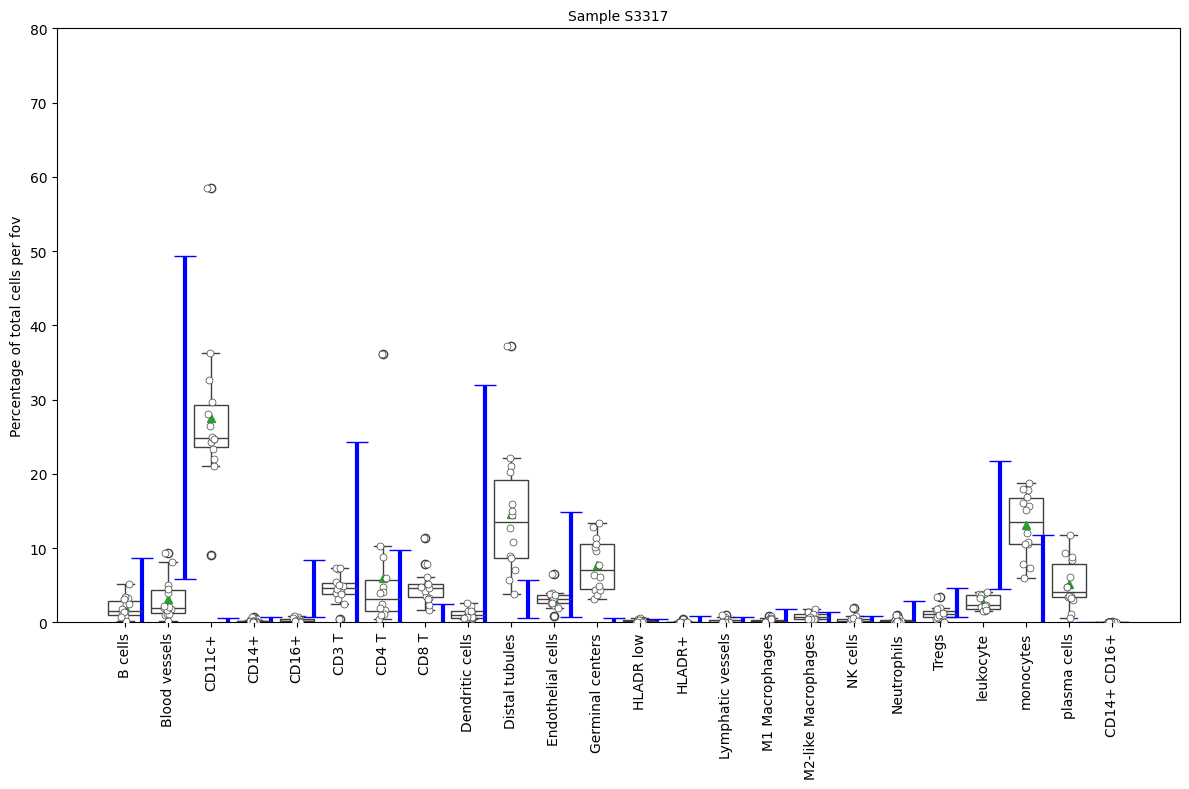

C:\Users\duho\AppData\Local\Temp\ipykernel_3296\2939339221.py:55: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=filtered_df, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)


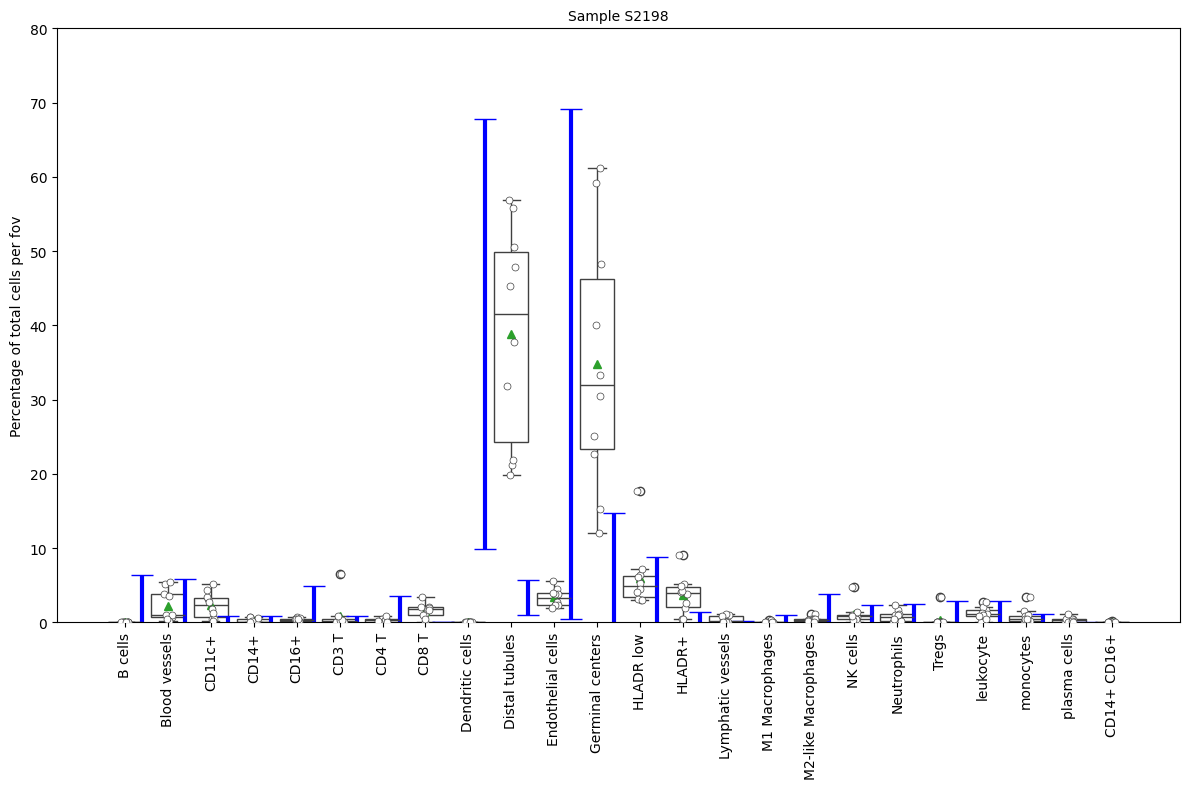

C:\Users\duho\AppData\Local\Temp\ipykernel_3296\2939339221.py:55: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=filtered_df, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)


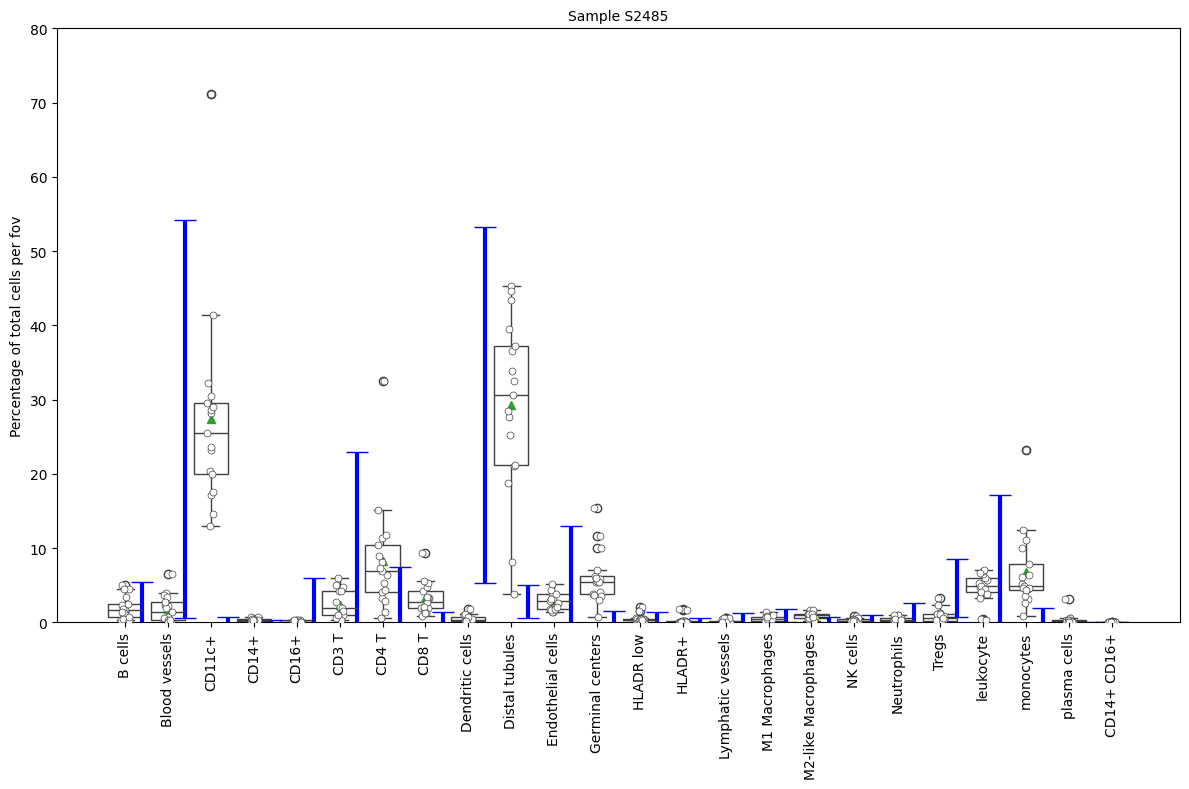

C:\Users\duho\AppData\Local\Temp\ipykernel_3296\2939339221.py:55: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=filtered_df, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)


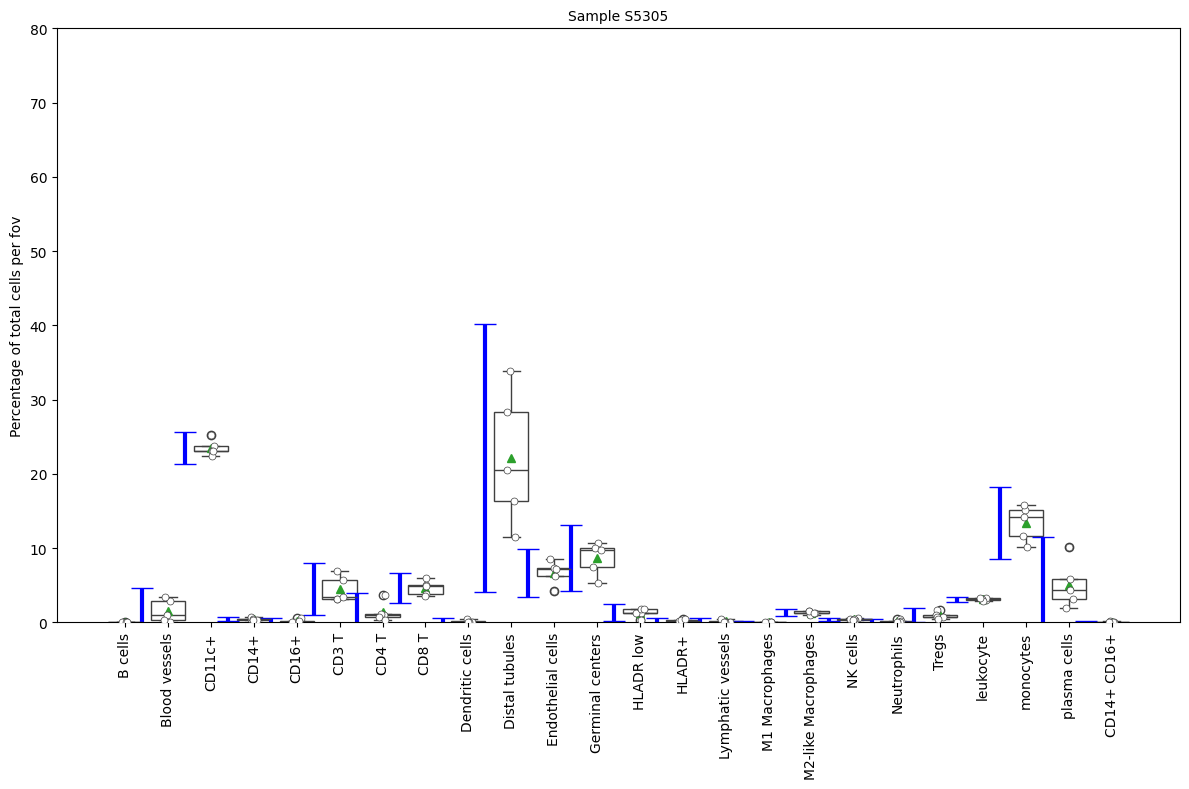

In [108]:

# df_percentage = pd.read_csv(os.path.join(base_dir, 'summary_TISAC_percentage.csv'))
df_percentage = pd.read_csv(r'C:\Users\duho\Desktop\percentage_without_unidentified.csv')
rec_cols = ['fov', 'B cells', 'Blood vessels', 'CD11c+', 'CD14+', 'CD16+', 'CD3 T',
       'CD4 T', 'CD8 T', 'Dendritic cells', 'Distal tubules',
       'Endothelial cells', 'Germinal centers', 'HLADR low', 'HLADR+',
       'Lymphatic vessels', 'M1 Macrophages', 'M2-like Macrophages',
       'NK cells', 'Neutrophils', 'Tregs', 'leukocyte', 'monocytes',
       'plasma cells', 'CD14+ CD16+']
df_percentage =df_percentage[rec_cols]
samples = ['S3317', 'S2198', 'S2485', 'S5305']


# colors = sns.color_palette('tab20')

# for sample, color in zip(samples, colors):
#     # Filter rows containing the sample number
#     filtered_df = df_percentage[df_percentage['fov'].str.contains(sample)]
    
#     # Set the figure size
#     plt.figure(figsize=(10, 8))
# # Generate a unique palette for each subplot
#     palette = sns.color_palette('tab20', n_colors=20)

#     # Plot the stacked horizontal bar graph with the unique palette
#     ax = filtered_df.drop(columns='fov').plot.barh(stacked=True, color=palette)  # Legend will be displayed

#     # Set the title and axis labels
#     plt.title(f'Stacked Horizontal Bar Graph of Cell Type Percentage for Sample {sample}')
#     plt.xlabel('Percentage')
#     plt.ylabel('FOV')

#     # Show the legend outside the plot
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#     # Save the plot
#     plt.tight_layout()  # Ensure tight layout to prevent legend overlap
#     plt.savefig(os.path.join(base_dir, f'bar_plot_{sample}_April15.png'), bbox_inches='tight')
#     plt.close()  # Close the plot to avoid displaying it again
for sample in samples:
    # Convert the index to strings and then filter rows containing the sample number
    filtered_df = df_percentage[df_percentage['fov'].str.contains(sample)]
    

    filtered_df.drop('fov',axis=1)

    filtered_df = filtered_df.drop('fov',axis=1)
        
    std_percentage = filtered_df.std()

    # Create box plot
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(data=filtered_df, orient="v", color='white', showfliers=True, showmeans=True)

    # Add individual data points using stripplot
    sns.stripplot(data=filtered_df, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)

    plt.subplots_adjust(bottom=0.3)
    ax.tick_params(axis='x', labelsize=10)
    ax.set_ylabel('Percentage of total cells per fov', fontsize=10)

#     # Move error bars to the right and use green color
    for i, col in enumerate(filtered_df.columns[1:]):
        mean_value = filtered_df[col].mean()
        std_value = std_percentage[col]
        # Increase the size of the mean value marker
#         plt.scatter(i , mean_value, color='blue', marker='o', s=60, edgecolor='blue')
        # Move error bars to the right
        ax.errorbar(i + 0.4, mean_value, yerr=2 * std_value, fmt='none', color='blue', capsize=8, lw=3)
    
    plt.title(f'Sample {sample}', fontsize=10)
    plt.ylim([0, 80])  # Commented out the ylim setting
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.savefig(os.path.join(base_dir, f'cell_type_sample{sample}_April15.png'))
    plt.show()
    
    

In [101]:
# # Create box plot

# plt.figure(figsize=(6, 8))
# ax = sns.boxplot(data=df_percentage, orient="v", color='white', showfliers=True, showmeans=True)

# # Add individual data points using stripplot
# sns.stripplot(data=df_percentage, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)

# plt.subplots_adjust(bottom=0.3)
# ax.tick_params(axis='x', labelsize=24)

# # Set plot labels and title
# ax.set_ylabel('Percentage of total cells per fov', fontsize=24)

# # Move error bars to the right and use green color
# for i, col in enumerate(df_percentage.columns):
#     mean_value = df_percentage[col].mean()
#     std_value = std_percentage[col]

#     plt.scatter(i , mean_value, color='blue', marker='o', s=60, edgecolor='blue')

#     # Move error bars to the right
#     ax.errorbar(i + 0.4, mean_value, yerr=2 * std_value, fmt='none', color='blue', capsize=8, lw=3)
    

# ax.set_ylim([0,1])
# plt.xticks(rotation=90)
# Save the plot
# plt.savefig('/Users/mansoorehahmadian/Desktop/boxplot_tonsil_percentage_2std.png')

# Show the plot

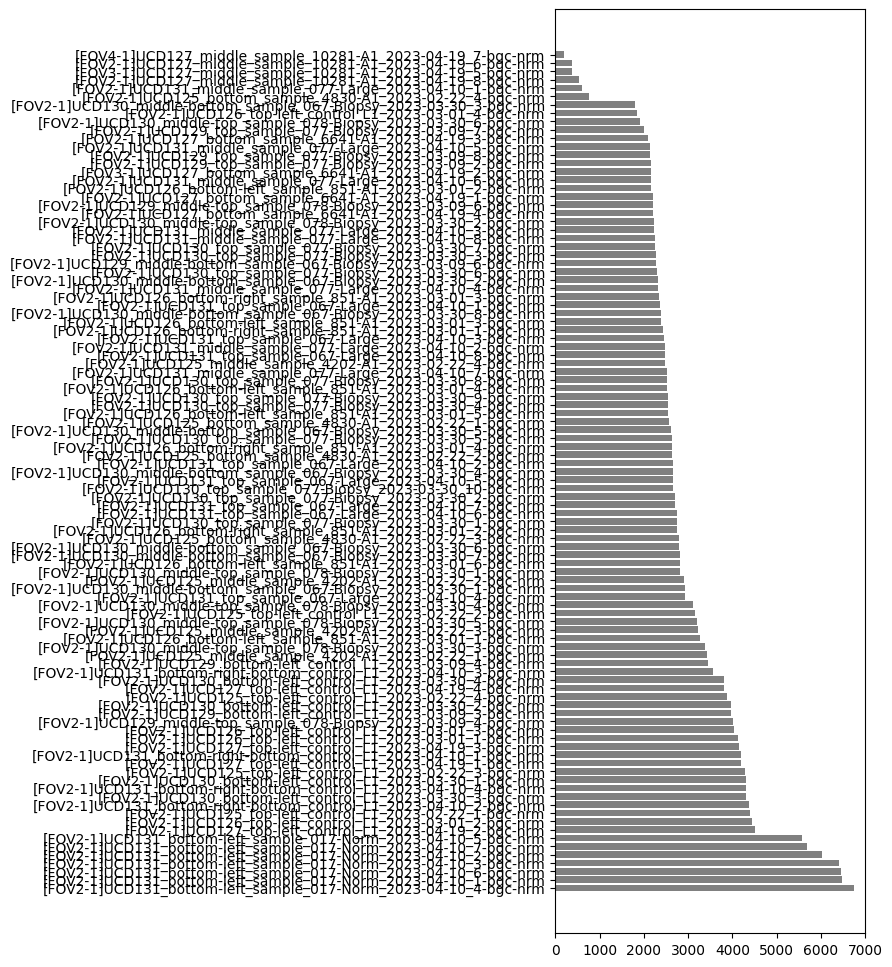

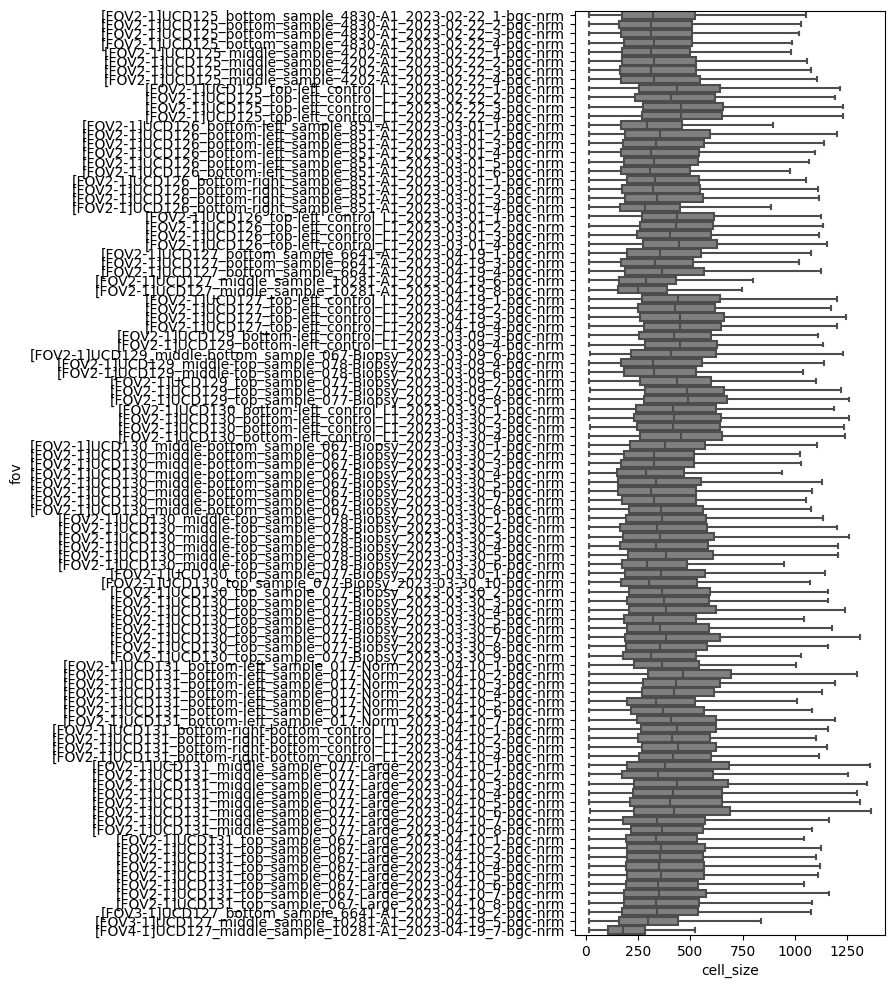

In [158]:
# non-kpmp



# df=df_all
# kpmp_l1 = ['L1', '017', '067', '077', '078']
# df_kpmp_l1 = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp_l1])
# df_non_kpmp = df[~df['fov'].str.contains('|'.join(kpmp_l1))]
# df_filtered = df_non_kpmp.copy()


# # Initialize an empty DataFrame to store the results
# result_df = pd.DataFrame(columns=['Sample', 'Count'])
# # Create a grid of subplots
# fig, axes = plt.subplots(1, 1, figsize=(4, 12))

# unique_counts = df_filtered['fov'].value_counts()
    
#     # Plot the bar plot in the current subplot
# axes.barh(unique_counts.index, unique_counts.values, color='gray')
# #     axes[i].set_xlabel('Total Cell Counts')

# axes.set_xlim([0, 7000])  # Set the same x-axis limit for all subplots

# plt.savefig(os.path.join(base_dir, 'cell_counts_non_kpmp'))

# fig, axes = plt.subplots(1, 1, figsize=(4, 12))
#     sns.boxplot(y=df_filtered["fov"], x=df_filtered["cell_size"], ax=axes, color='gray', showfliers=False)
#     plt.savefig(os.path.join(base_dir,'cell_size_non_kpmp.png'))
   

df = df_all  # Assuming df_all is your original DataFrame
kpmp_l1 = ['L1', '017', '067', '077', '078']
df_kpmp_l1 = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp_l1])
df_non_kpmp = df[~df['fov'].str.contains('|'.join(kpmp_l1))]
df_filtered = df_non_kpmp.copy()

# Sort df_filtered based on 'fov'
df_filtered = df_filtered.sort_values('fov')
df_filtered = df_all
# Get the counts of unique values and sort them by index in ascending order
unique_counts = df_filtered['fov'].value_counts()#.sort_index()
unique_counts.to_csv(os.path.join(base_dir, 'cell_ceounts_per_fov.csv'))
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Sample', 'Count'])
# Create a grid of subplots
fig, axes = plt.subplots(1, 1, figsize=(4, 12))

# Plot the bar plot in the current subplot
axes.barh(unique_counts.index, unique_counts.values, color='gray')
axes.set_xlim([0, 7000])  # Set the same x-axis limit for all subplots

# plt.savefig(os.path.join(base_dir, 'cell_counts_non_kpmp'))

# # Create a new figure for the boxplot
# fig, axes = plt.subplots(1, 1, figsize=(4, 12))

# # Sort df_filtered by 'Sample' for the boxplot
# df_filtered = df_filtered.sort_values('Sample')

# # Plot the boxplot with sorted 'Sample'
# sns.boxplot(y=df_filtered["fov"], x=df_filtered["cell_size"], ax=axes, color='gray', showfliers=False)
# plt.savefig(os.path.join(base_dir, 'cell_size_non_kpmp.png'))

# plt.show()

# df=df_all
# kpmp_l1 = ['L1', '017', '067', '077', '078']
# df_kpmp_l1 = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp_l1])
# df_non_kpmp = df[~df['fov'].str.contains('|'.join(kpmp_l1))]
# df_filtered = df_non_kpmp.copy()


fig, axes = plt.subplots(1, 1, figsize=(4, 12))
sns.boxplot(y=df_filtered["fov"], x=df_filtered["cell_size"], ax=axes, color='gray', showfliers=False)
# plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/cell_size_non_kpmp.png')
plt.show()





In [25]:
df_percentage = pd.read_csv(r'C:\Users\duho\Desktop\percentage.csv')
rec_cols = ['fov', '111_CD11c+ or background', '130_CD3+ or CD11c+ or unidentified',
       '16_CD11c+', '173_CD11c+Foxp3', '176_CD11c+', '189_CD16+',
       '26_CD11c+ or background', '48_CD11c+', 'B cells', 'Blood vessels',
       'CD14+ CD16-low', 'CD16+ CD45+', 'CD3 T', 'CD4 T', 'CD8 T',
       'Dendritic cells', 'Distal tubules', 'Endothelial cells',
       'Germinal centers', 'HLADR+', 'Lymphatic vessels',
       'M2-like Macrophages', 'Monocytes CD16+', 'Monocytes or CD3T',
       'NK cells', 'Neutrophils', 'Total Macrophages', 'Tregs', 'Unidentified',
       'leukocyte', 'mixed', 'monocytes', 'plasma cells',
       '109_CD14+ HLADR low', '2_CD11c+Foxp3', '61_CD11c+ or Unidentified',
       'CD11b+ CD14+ CD45+', '139_CD14+ CD16+ CD45 low CD4 low',
       'CD14+ CD16+']
df_percentage =df_percentage[rec_cols]

kpmp_l1 = ['LN']
#kpmp_l1 = ['L1']


df_kpmp_l1 = pd.concat([df_percentage[df_percentage['fov'].str.contains(sample)] for sample in kpmp_l1])
df_non_kpmp = df_percentage[df_percentage['fov'].str.contains('|'.join(kpmp_l1))]
df_percentage = df_non_kpmp
print(len(df_percentage['fov'].unique()))
        
std_percentage = df_percentage.std()

    # Create box plot
plt.figure(figsize=(16, 12))
ax = sns.boxplot(data=df_percentage, orient="v", color='white', showfliers=True, showmeans=True)

    # Add individual data points using stripplot
sns.stripplot(data=df_percentage, orient="v", color="white", size=5, jitter=True, edgecolor="gray", linewidth=0.5)

plt.subplots_adjust(bottom=0.3)
ax.tick_params(axis='x', labelsize=24)
ax.set_ylabel('Percentage of total cells per fov', fontsize=24)

#     # Move error bars to the right and use green color
for i, col in enumerate(filtered_df.columns[1:]):
    mean_value = df_percentage[col].mean()
    std_value = std_percentage[col]
        # Increase the size of the mean value marker
#         plt.scatter(i , mean_value, color='blue', marker='o', s=60, edgecolor='blue')
        # Move error bars to the right
    ax.errorbar(i + 0.4, mean_value, yerr=2 * std_value, fmt='none', color='blue', capsize=8, lw=3)
    
plt.title(f'non-KPMP L1 kidney samples', fontsize=24)
plt.ylim([0, 1])  # Commented out the ylim setting
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'non_kpmp_just_L1_April15'))
plt.show()

110


TypeError: could not convert string to float: '[FOV1-1] UCD144_top_sample_LN-15_17-S2247_2023-10-10_1-nrm'

<Figure size 1000x5000 with 0 Axes>

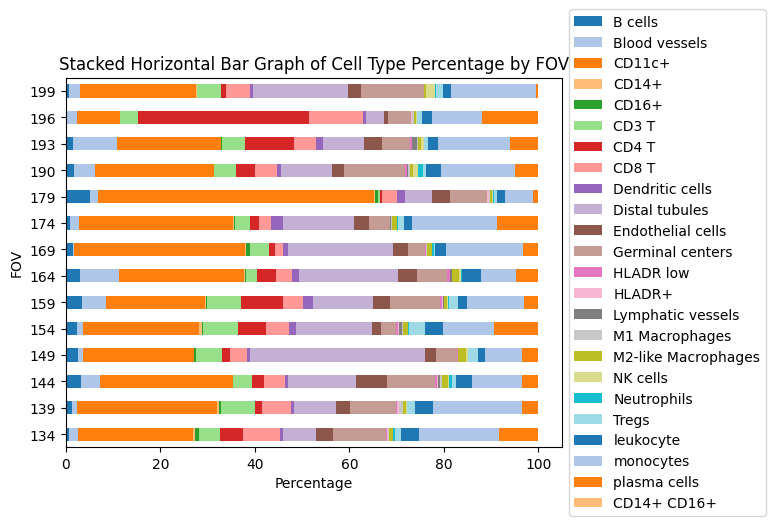

<Figure size 1000x5000 with 0 Axes>

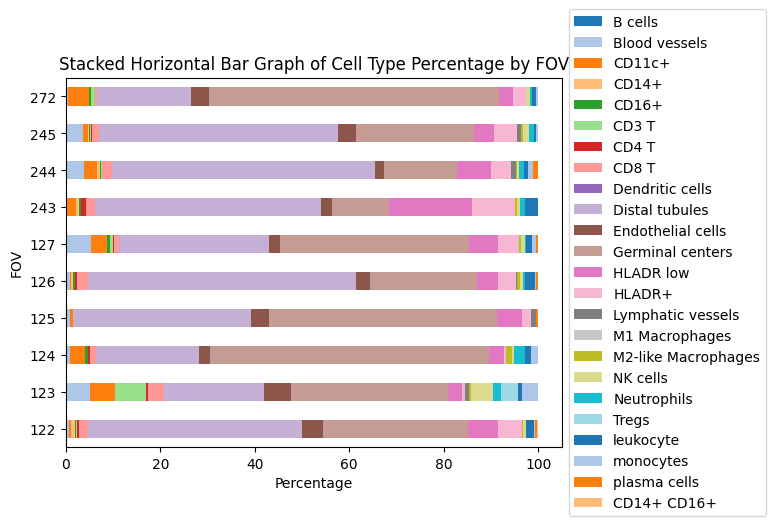

<Figure size 1000x5000 with 0 Axes>

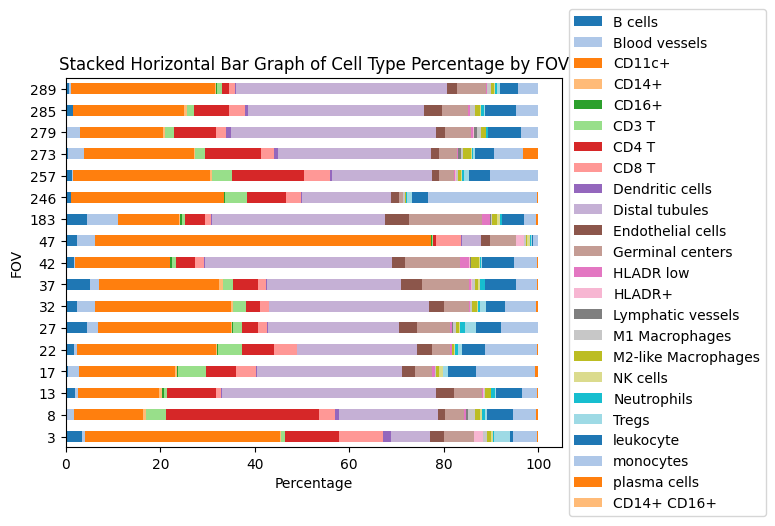

<Figure size 1000x5000 with 0 Axes>

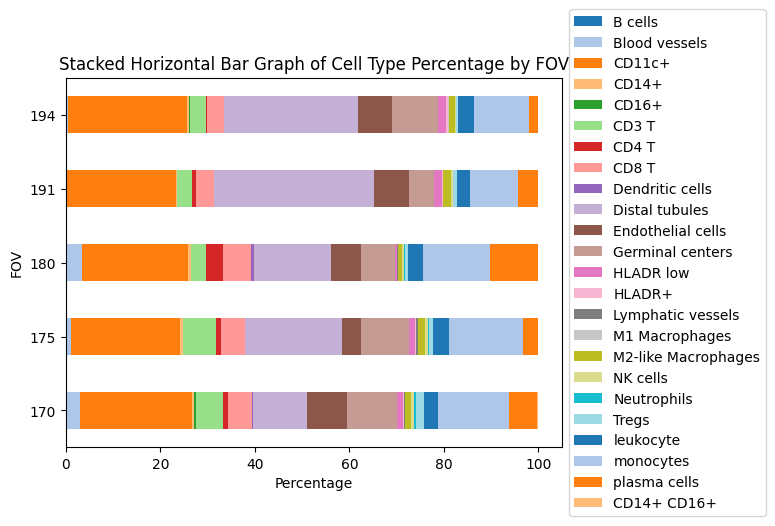

In [102]:


import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经定义了 samples 和 df_percentage

for i, sample in enumerate(samples):
    plt.figure(figsize=(10, 50))
    
    # 使用指定的颜色调色板
    palette = sns.color_palette('tab20', n_colors=40)
    df_filtered = df_percentage[df_percentage['fov'].str.contains(sample)]
    
    # 绘制堆叠的水平条形图
    ax = df_filtered.drop(columns='fov').plot.barh(stacked=True, color=palette)  
    
    # 移除图例
    ax.legend().remove()
    
    # 设置标题和坐标轴标签
    plt.title('Stacked Horizontal Bar Graph of Cell Type Percentage by FOV')
    plt.xlabel('Percentage')
    plt.ylabel('FOV')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # 显示图表
    plt.show()

In [ ]:
#plt.subplots(len(sample), 1, figsize=(20, 100))

for i, sample in enumerate(samples):

    plt.figure(figsize=(10, 50))
# Plot the stacked horizontal bar graph
    palette = sns.color_palette('tab20', n_colors=40)
    df_filtered = df_percentage[df_percentage['fov'].str.contains(sample)]
    # Plot the stacked horizontal bar graph with the unique palette
    ax = df_filtered.drop(columns='fov').plot.barh(stacked=True, color=palette)  # Legend will be displayed

# Set the title and axis labels
    plt.title('Stacked Horizontal Bar Graph of Cell Type Percentage by FOV')
    plt.xlabel('Percentage')
    plt.ylabel('FOV')

# Move the legend outside the graph
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(os.path.join(base_dir, 'composit_cell_non_kpmp_L1_April15'))
# Show the plot
    plt.show()

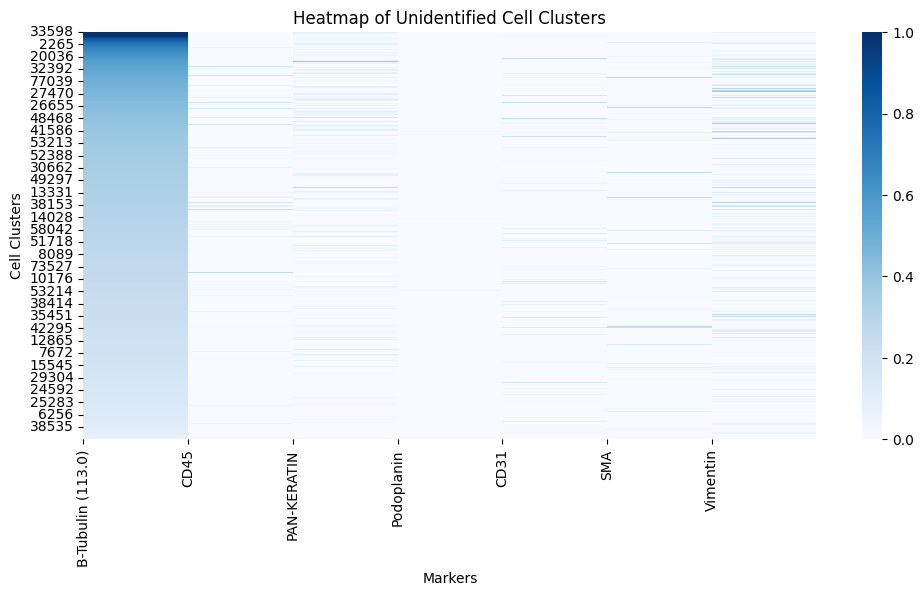

In [209]:
df = pd.read_csv('/Users/mansoorehahmadian/Desktop/TISAC_tabular_data_figures/cell_table_phenotyped_QC_final.csv')
kpmp = ['L1']

# Filter rows for each sample in batch_1 and concatenate into a single DataFrame
df_L1 = pd.concat([df[df['fov'].str.contains(sample)] for sample in kpmp])
df = df[df['fov'].str.contains('|'.join(kpmp))]


# Select columns for the heatmap
selected_columns = ['B-Tubulin (113.0)','CD45_FRmap', 'PAN-KERATIN_FRmap', 
                    'Podoplanin_FRmap', 'CD31_FRmap', 'SMA_FRmap', 
                    'Vimentin_FRmap']
# print(df.columns)
# Filter rows where 'CellType' is 'unidentified'
# Filter rows where 'CellType' is 'unidentified'
unidentified_df = df[df['CellType'] == 'unidentified']

# Sort the DataFrame based on multiple columns
sorted_df = unidentified_df.sort_values(by=['B-Tubulin (113.0)', *selected_columns[1:]], ascending=False)

# Normalize the data
percentiles = sorted_df.quantile(0.99)
sorted_df['B-Tubulin (113.0)'] = sorted_df['B-Tubulin (113.0)'] / percentiles['B-Tubulin (113.0)']
sorted_df['B-Tubulin (113.0)'] = sorted_df['B-Tubulin (113.0)'].clip(upper=1)



# Select columns for the heatmap
sorted_df = sorted_df[selected_columns]

# Plot the heatmap

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_df, cmap='Blues')
plt.tight_layout()
plt.xlabel('Markers')
plt.xticks(ticks=range(len(selected_columns)), labels=[col.split('_')[0] for col in selected_columns], rotation=90)
plt.ylabel('Cell Clusters')
plt.title('Heatmap of Unidentified Cell Clusters')
plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/hm_L1_contol_old.png')
plt.show()
# print(df.columns)

# # custom_order_cellType = ['CD4T', 'CD3T', 'CD8T', 'Neutrophils', 'NK cells', 'M1 Macrophages',
# #                            'M2 Macrophages', 'CD163+DC_SIGN+', 'CD16+', 'other-immune',
# #                            'HLADR+', 'Blood vessel endothelial cells','Lympathic vessel endothelial cells',  
# #                            'SMA+','SMA+Vimentin+', 'Vimentin+',  'Epithelial cells','Tubular cells','Unknown']

# clustering_marker = [ 'CD45 (163)','HLADR (174)',
#                      'CD31 (145)', 'Podoplanin (170)', 'SMA (164)','Vimentin (154)',
#                      'PAN-KERATIN (142)','B-Tubulin (113)']

# percentiles = df.iloc[:,0:-1].quantile(0.995)
# df = df[clustering_marker]

# selected_columns = clustering_marker[:]



# def power_normalize(column, power=1):
#     return (column ** power) / percentiles[column.name] if column.name in selected_columns else column
# # Apply the function to the DataFrame
# df = df.apply(power_normalize)



# # df = df[clustering_marker[:]]

# summary_hm = df.groupby('CellType').median()

# summary_hm_sorted = summary_hm.reindex(custom_order_cellType)

# # for col in summary_hm_sorted.columns:
# #     summary_hm_sorted.rename(columns={col: col.split('(')[0]}, inplace=True)
    
# fig, (ax) = plt.subplots(figsize=[10,6])
# sns.heatmap(summary_hm_sorted,ax=ax, cmap='Blues')
# plt.subplots_adjust(bottom=0.25)
# plt.subplots_adjust(left=0.2)
# plt.xlabel("markers")
# plt.ylabel("cell clusters")
# # Add a color bar with a label
# cax = plt.gcf().axes[-1]  # Get the color bar axes
# cax.set_ylabel("Average expression per cluster measured on image", rotation=90, labelpad=15)  # Add color bar label
# plt.title('L1 control')
# summary_hm_sorted_reset = summary_hm_sorted.reset_index()
# plt.savefig('/Users/mansoorehahmadian/Desktop/TISAC_V3_figures/hm_L1_contol_old.png')
# plt.show()


In [ ]:
list of fovs = ['[FOV2-1] UCD125_top-left_control_L1_2023-02-22_1-bgc-nrm'
'[FOV2-1] UCD125_top-left_control_L1_2023-02-22_2-bgc-nrm'
'[FOV2-1] UCD125_top-left_control_L1_2023-02-22_3-bgc-nrm'
[FOV2-1] UCD125_top-left_control_L1_2023-02-22_4-bgc-nrm
[FOV2-1] UCD126_top-left_control_L1_2023-03-01_1-bgc-nrm
[FOV2-1] UCD126_top-left_control_L1_2023-03-01_2-bgc-nrm
[FOV2-1] UCD126_top-left_control_L1_2023-03-01_3-bgc-nrm
[FOV2-1] UCD126_top-left_control_L1_2023-03-01_4-bgc-nrm
[FOV2-1] UCD127_top-left_control_L1_2023-04-19_1-bgc-nrm
[FOV2-1] UCD127_top-left_control_L1_2023-04-19_2-bgc-nrm
[FOV2-1] UCD127_top-left_control_L1_2023-04-19_3-bgc-nrm
[FOV2-1] UCD127_top-left_control_L1_2023-04-19_4-bgc-nrm]